# Pie Chart Map

![alt text](https://datavizproject.com/wp-content/uploads/2016/06/DVP_101_200-43.png)

A Pie Chart Map is simply a combination of a Pie Chart data visualization and a map. It is used to visualize location and numerical proportion in a simple way. Sometimes you will see a combination of both Pie Chart, Map and Bubble Chart. Where the size of the Pie Chart circle allows one more dimension to the visualization.

# Examples

## Choropie
https://github.com/vinceniko/choropie

```
$ pip install choropie

or

$ git clone https://github.com/vinceniko/choropie.git
$ python setup.py install
```

In [3]:
import numpy as np
import pandas as pd
import os
import datetime as dt

from choropie import ChoroPie as cp

In [2]:
dict_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MP': 'Northern Mariana Islands',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NA': 'National',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VI': 'Virgin Islands',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [4]:
df_pop = pd.read_excel('data/state_population_estimates.xlsx', skiprows=3)  # taken from census data

In [5]:
df_pop.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016
0,United States,308745538.0,308758105.0,309348193.0,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0
1,Northeast,55317240.0,55318353.0,55388056.0,55632766.0,55829059.0,55988771.0,56116791.0,56184737.0,56209510.0
2,Midwest,66927001.0,66929825.0,66978602.0,67153331.0,67332320.0,67543948.0,67726368.0,67838387.0,67941429.0
3,South,114555744.0,114563005.0,114863114.0,116061801.0,117299171.0,118424320.0,119696311.0,121039206.0,122319574.0
4,West,71945553.0,71946922.0,72118421.0,72815460.0,73537829.0,74247869.0,75023986.0,75834288.0,76657000.0


In [6]:
def remove_period(x):
    if isinstance(x, str) and x[0] == '.':
        x = x.replace('.', '')
        return x


df_pop.iloc[:, 0] = df_pop.iloc[:, 0].apply(remove_period)  # perform remove_period

In [7]:
df_pop.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016
0,None,308745538.0,308758105.0,309348193.0,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0
1,None,55317240.0,55318353.0,55388056.0,55632766.0,55829059.0,55988771.0,56116791.0,56184737.0,56209510.0
2,None,66927001.0,66929825.0,66978602.0,67153331.0,67332320.0,67543948.0,67726368.0,67838387.0,67941429.0
3,None,114555744.0,114563005.0,114863114.0,116061801.0,117299171.0,118424320.0,119696311.0,121039206.0,122319574.0
4,None,71945553.0,71946922.0,72118421.0,72815460.0,73537829.0,74247869.0,75023986.0,75834288.0,76657000.0


In [8]:
series_pop = df_pop.set_index(df_pop.columns[0]).loc['Alabama':'Wyoming', 2016]
series_pop.name = 'population'

In [9]:
series_pop.head()

Unnamed: 0
Alabama        4863300.0
Alaska          741894.0
Arizona        6931071.0
Arkansas       2988248.0
California    39250017.0
Name: population, dtype: float64

In [10]:
df_killings = pd.read_csv('data/PoliceKillingsUS.csv', encoding="latin1") # set proper encoding or get error. i combined the sheets into one file here

In [11]:
df_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [12]:
def abr(x):
    try:
        if x[0] == 'A':
            return "Asian"
        if x[0] == 'B':
            return "Black"
        if x[0] == 'H':
            return "Hispanic"
        if x[0] == 'N':
            return "Native American"
        if x[0] == 'O':
            return "Ocean Pacific"
        if x[0] == 'W':
            return "White"
    except Exception:
        return None


df_killings['race'] = df_killings['race'].apply(abr)

In [13]:
df_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [14]:
# used for title of plot
max_date = df_killings['date'].apply(
    lambda x: dt.datetime.strptime(x, '%d/%m/%y')).max().strftime('%b. %d, %y')
min_date = df_killings['date'].apply(
    lambda x: dt.datetime.strptime(x, '%d/%m/%y')).min().strftime('%b. %d, %y')

In [15]:
series_state = df_killings.groupby('state').count()['id']
series_state.rename('counts', inplace=True)

state
AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: counts, dtype: int64

In [16]:
series_race = df_killings.groupby(['state', 'race']).count()['id']

In [17]:
series_race.head()

state  race           
AK     Black               1
       Native American     6
       White               7
AL     Black              14
       White              32
Name: id, dtype: int64

In [18]:
series_state_crime_race_percs = series_race / \
    series_race.groupby('state').sum() * 100

In [20]:
def set_index_states(df):
    if isinstance(df.index, pd.MultiIndex):
        list_abb = [dict_states[abb] for abb in df.index.levels[0]]
        df.index.set_levels(list_abb, level=0, inplace=True)
    elif isinstance(df.index, pd.Index):
        list_abb = [dict_states[abb] for abb in df.index]
        df.index = list_abb


# fix indexes (replace state abbreviations with state name)
# series_race and series_state
set_index_states(series_race)
set_index_states(series_state)

In [21]:
series_race.head()

state    race           
Alaska   Black               1
         Native American     6
         White               7
Alabama  Black              14
         White              32
Name: id, dtype: int64

In [22]:
series_state.head()

Alaska         15
Alabama        50
Arkansas       26
Arizona       118
California    424
Name: counts, dtype: int64

In [23]:
df_state = pd.concat([series_state, series_pop], axis=1)
# per capita percentage
df_state['per_capita'] = df_state['counts'] / df_state['population']

/home/sean/anaconda3/envs/gpi/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [24]:
df_state.head()

,counts,population,per_capita
Alabama,50,4863300.0,0.000010
Alaska,15,741894.0,0.000020
Arizona,118,6931071.0,0.000017
Arkansas,26,2988248.0,0.000009
California,424,39250017.0,0.000011


In [27]:
# population by race for each state
df_state_race = pd.read_excel('data/state_race.xlsx', index_col=0)

df_state_race = df_state_race.iloc[1:, :]
df_state_race.columns.name = 'race'

# transform columns into multiindex
df_massaged = pd.melt(df_state_race.reset_index(),
                      id_vars='Geography', value_vars=df_state_race.columns)
df_massaged = df_massaged.groupby(
    ['Geography', 'race']).agg(lambda x: x.iloc[0])

In [28]:
df_massaged.head()

value
Geography race                   
Alabama   Asian              1590
          Black             15233
          Hispanic         203845
          Mixed              6966
          Native American    6755

In [29]:
df_race = pd.concat([series_race, series_state_crime_race_percs,
                     df_massaged], axis=1).dropna()
df_race.columns = ['count', 'percs', 'pop']  # count, percent, population
df_race['per_capita'] = df_race['count'] / df_race['pop']


In [30]:
df_race.head()

count      percs     pop  per_capita
Alabama Black             14.0  30.434783   15233    0.000919
        White             32.0  69.565217  170587    0.000188
Alaska  Black              1.0   7.142857    2955    0.000338
        Native American    6.0  42.857143    5288    0.001135
        White              7.0  50.000000   36474    0.000192

/home/sean/anaconda3/envs/gpi/lib/python3.7/site-packages/choropie-0.0.3-py3.7.egg/choropie/ChoroPie.py:170: MatplotlibDeprecationWarning: Passing vertices as `(verts, 0)` is deprecated since Matplotlib 3.0, and support for it will be removed in 3.2.  Directly pass `verts` instead.
  zorder=3)


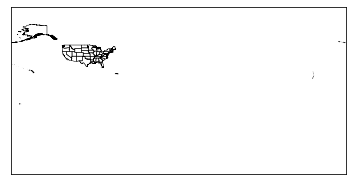

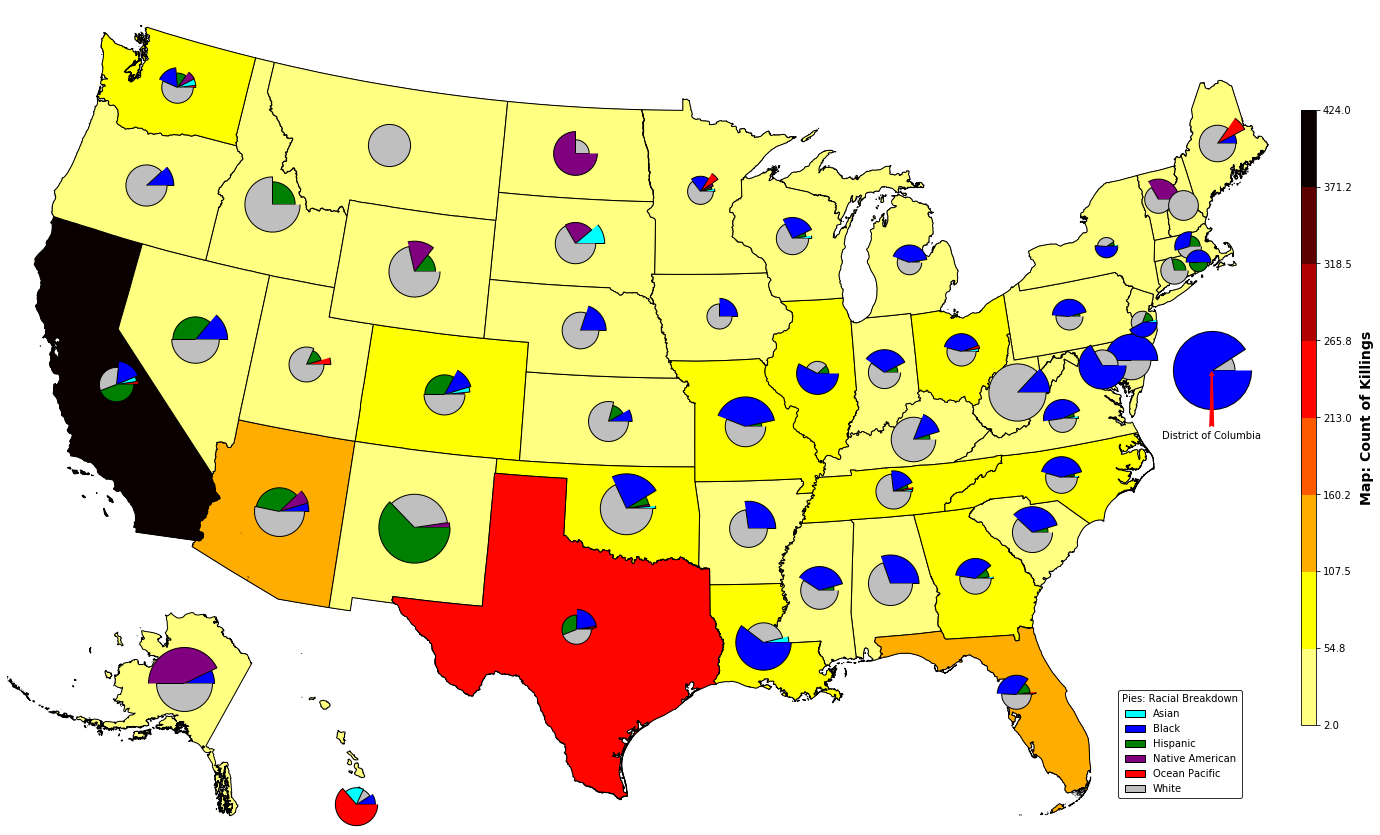

In [34]:


# convenience functions for determining which shp attrtibute to use to match with area_name index
shp_file = 'data/cb_2016_us_state_500k/cb_2016_us_state_500k'  # file path to shp_file sans extension
shp_lst = cp.get_shp_attributes(shp_file)  # extracts shp attrbiutes (same as basemap."area"_info)
shp_key = cp.find_shp_key(df_state['counts'].index, shp_lst)  # determines which shp attribute matches the index of area_names that will be used for the plotting

basemap = dict(
    basemap_kwargs=dict(
        llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95
    ),
    shp_file='data/cb_2016_us_state_500k/cb_2016_us_state_500k',
    shp_key='NAME',
    figsize=(22, 12),
    )

choro = dict(
    num_colors=8,
    cmap='hot_r',
    color_data=df_state['counts'],
    )

pie = dict(
    size_data=df_state['per_capita'],
    size_ratios=df_race['per_capita'],
    pie_data=df_race['percs'],
    pie_dict={'Asian': 'cyan', 'Black': 'blue', 'Hispanic': 'green',
        'Native American': 'purple', 'Ocean Pacific': 'red', 'White':'0.75'},
    scale_factor_size=1,
    scale_factor_ratios=1/2
    )

test = cp.ChoroPie(**basemap)

test.choro_plot(**choro)
test.pie_plot(**pie)

test.insert_colorbar(colorbar_title='Map: Count of Killings', colorbar_loc_kwargs=dict(location='right'))
test.insert_pie_legend(legend_loc='lower right', pie_legend_kwargs=dict(title='Pies: Racial Breakdown'))